In [220]:
# Using the coffee data set, answer a bunch of questions
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [221]:
coffee = pd.read_csv("../Data/coffee/total-production.csv")
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_production  56 non-null     object 
 1   1990              56 non-null     float64
 2   1991              56 non-null     float64
 3   1992              56 non-null     float64
 4   1993              56 non-null     float64
 5   1994              56 non-null     float64
 6   1995              56 non-null     float64
 7   1996              56 non-null     float64
 8   1997              56 non-null     float64
 9   1998              56 non-null     float64
 10  1999              56 non-null     float64
 11  2000              56 non-null     float64
 12  2001              56 non-null     float64
 13  2002              56 non-null     float64
 14  2003              56 non-null     float64
 15  2004              56 non-null     float64
 16  2005              56 non-null     float64
 17 

In [ ]:
# Create a bar chart of the top 10 coffee producers by total production in the 'total-production.csv'
# Index should be years
# Each column is a country

# Let's get a list of total production across all the years with some reshaping
reshape_cols = coffee.columns[1:]

coffee_long = pd.melt(coffee,
                      id_vars = ["total_production"],
                      value_vars = reshape_cols,
                      var_name = "year", 
                      value_name = "production").sort_values(["total_production", "year"])

coffee_long.rename(columns = {"total_production":"country"}, inplace=True)

top_10 = (coffee_long
          .groupby("country")
          .agg(total_production = ("production", "sum"))
          .sort_values("total_production", ascending=False)
          .iloc[0:10]
)

# Extract a list of the top 5 countries
top_5 = top_10.index[0:5]


Index(['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia'], dtype='object', name='country')

/var/folders/mv/y6dng09x31s7lvvx2x62hf1r0000gn/T/ipykernel_97170/1687316742.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = labels)


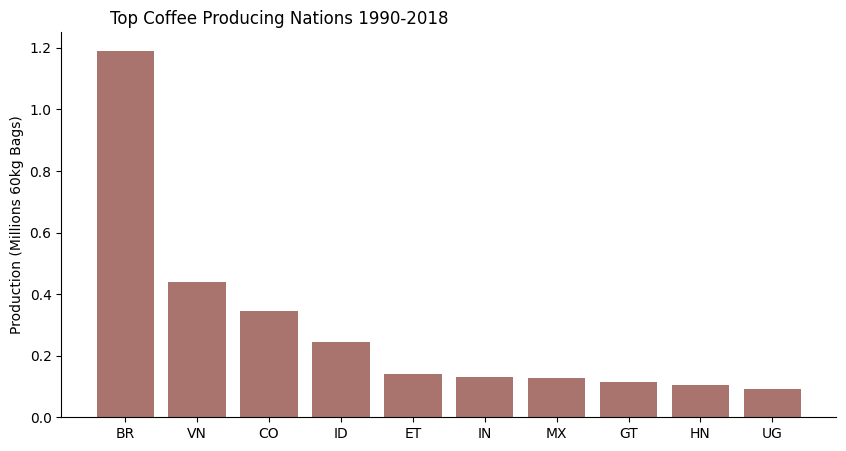

In [58]:
# Create a bar graph of the top 10 coffee prodcers. 
fig, ax = plt.subplots(figsize = (10, 5))

labels = ["BR", "VN", "CO", "ID", "ET", "IN", "MX", "GT", "HN", "UG"]

ax.bar(top_10.index, top_10["total_production"]/1e6, color = "#A9746E")
ax.set_xticklabels(labels = labels)

ax.spines[["top", "right"]].set_visible(False)
ax.set_title("Top Coffee Producing Nations 1990-2018", horizontalalignment ="right")
ax.set_ylabel("Production (Millions 60kg Bags)");



In [245]:
# Create a line graph of the top 5 counttries coffee production over time
pivot_sorted = (
    coffee_long[coffee_long["country"].isin(top_5)]
       .assign(overall = lambda x: x.groupby("country")["production"].transform("sum"))
       .sort_values(["overall", "country"], ascending=False)
       .pivot_table(index = "year", 
                    columns = "country",
                    values = "production", 
                    aggfunc = "sum",
                    sort = False) # Don't sort columns in alpha order
)

# Cast date index value as a datetime64[ns] type
pivot_sorted.index =  pivot_sorted.index.astype("datetime64[ns]")

pivot_sorted.columns

Index(['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia'], dtype='object', name='country')

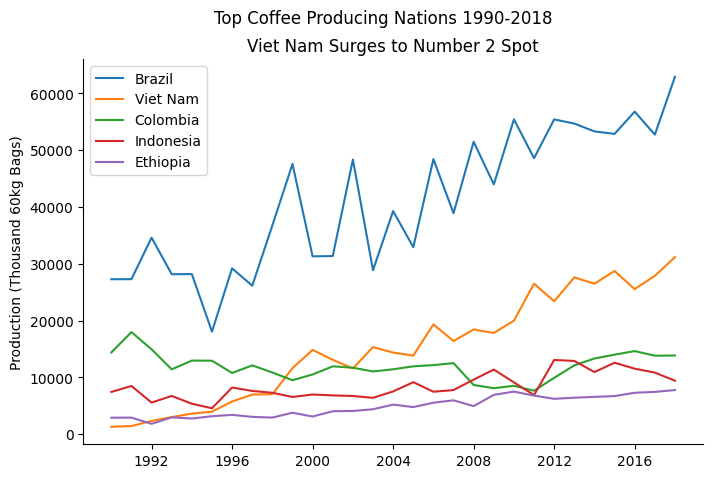

In [246]:
# Create a line chart with the top five producers over time. Include a legend
# Convert the index to a datetime64[ns]
labels_list = pivot_sorted.columns
xaxis_labels = list(range(1992, 2018, 1))


fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(pivot_sorted)
ax.legend(labels = labels_list)
fig.suptitle("Top Coffee Producing Nations 1990-2018")
ax.set_title("Viet Nam Surges to Number 2 Spot")
ax.set_ylabel("Production (Thousand 60kg Bags)")
ax.spines[["top", "right"]].set_visible(False)



In [250]:
# Let's look at Brazil, compared to the rest of the workd in terms of total production by year
coffee_long["grouper"] = np.where(coffee_long["country"] == "Brazil", "Brazil", "rest_of_world")

brazil = (
    coffee_long
    .groupby(["grouper", "year"])
    .agg(production = ("production", "sum"))
    .reset_index()
)

brazil_wide = brazil.pivot_table(
    index = "year",
    columns = "grouper",
    values = "production",
    aggfunc = "mean"
)
brazil_wide

grouper,Brazil,rest_of_world
year,,
1990,27285.6286,65944.4310
1991,27293.4934,73973.1910
1992,34603.3542,63922.5450
1993,28166.9786,63597.6430
1994,28192.0470,65121.1470
1995,18060.2022,69257.2560
1996,29196.7430,74105.8530
1997,26148.0040,73713.1950
1998,36760.8533,72131.3598


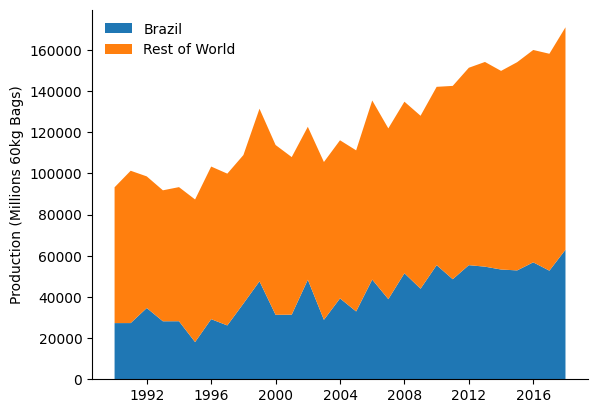

In [259]:
fig, ax = plt.subplots()

ax.stackplot(
    brazil_wide.index.astype("datetime64[ns]"),
    brazil_wide["Brazil"],
    brazil_wide["rest_of_world"],
    labels=["Brazil", "Rest of World"]
)

ax.legend(frameon = False)
ax.set_ylabel(y_label)
ax.spines[["top", "right"]].set_visible(False)

In [169]:
brazil.pivot_table(index = "year",
                            columns = "grouper",
                            values = "production",
                            aggfunc = "sum").assign(overall = lambda x: x["Brazil"] + x["rest_of_world"],
                                                    share = lambda x: x["Brazil"]/x["overall"])

grouper,Brazil,rest_of_world,overall,share
year,,,,
1990,27285.6286,65944.4310,93230.0596,0.292670
1991,27293.4934,73973.1910,101266.6844,0.269521
1992,34603.3542,63922.5450,98525.8992,0.351211
1993,28166.9786,63597.6430,91764.6216,0.306948
1994,28192.0470,65121.1470,93313.1940,0.302123
1995,18060.2022,69257.2560,87317.4582,0.206834
1996,29196.7430,74105.8530,103302.5960,0.282633
1997,26148.0040,73713.1950,99861.1990,0.261843
1998,36760.8533,72131.3598,108892.2131,0.337589


Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

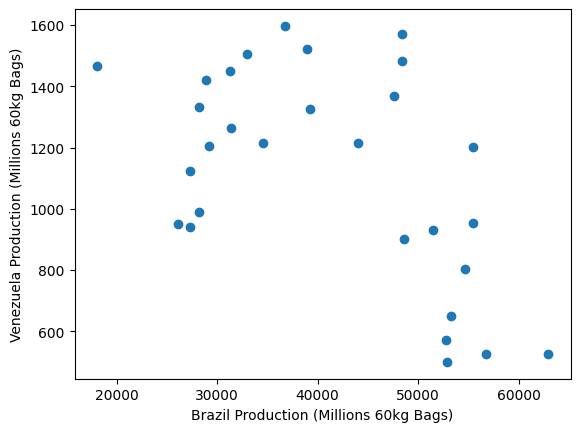

In [ ]:
# Plot brazil versus venezuela over time
y_label = "Production (Millions 60kg Bags)"

fig, ax = plt.subplots()

ax.scatter(coffee_t["Brazil"], coffee_t["Venezuela"])
ax.set_ylabel("Venezuela " + y_label)
ax.set_xlabel("Brazil " + y_label)
ax.set_title("Venezuela Production Declines as Brazil Expands")

Text(0.5, 1.0, 'Viet Nam and Brazil Trend Up Together')

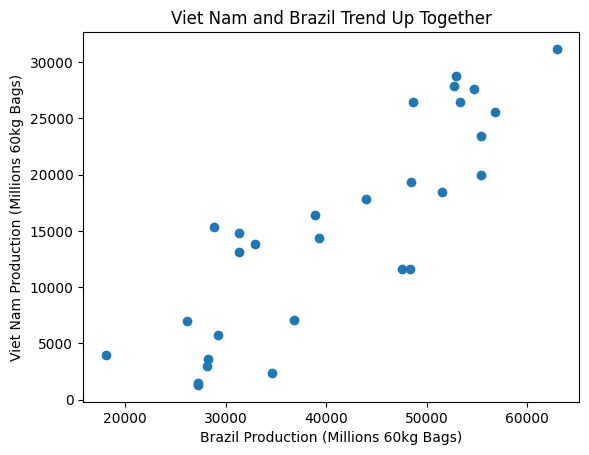

In [120]:
# Plot brazil versus venezuela over time
y_label = "Production (Millions 60kg Bags)"

fig, ax = plt.subplots()

ax.scatter(coffee_t["Brazil"], coffee_t["Viet Nam"])
ax.set_ylabel("Viet Nam " + y_label)
ax.set_xlabel("Brazil " + y_label)
ax.set_title("Viet Nam and Brazil Trend Up Together")

In [150]:
# Create a pie graph with the top 5 produers and the "rest of the world"
coffee_long["new_country"] = coffee_long["country"].apply(lambda x: x if x in top_5 else "rest_of_world")

coffee_pie_top = (
    coffee_long.loc[(coffee_long["year"] == "2018") & (coffee_long["country"].isin(top_5))]
    .groupby("country")
    .agg(production = ("production", "sum"))
    .sort_values(
        by="production",
        ascending=False
    )
)

coffee_pie_bottom = (
    coffee_long.loc[(coffee_long["year"] == "2018") & (~coffee_long["country"].isin(top_5))]
    .groupby("new_country")
    .agg(production = ("production", "sum"))
)

coffee_pie = pd.concat([coffee_pie_top, coffee_pie_bottom])

Text(0.5, 1.0, 'Share of Global Coffee Production 2018')

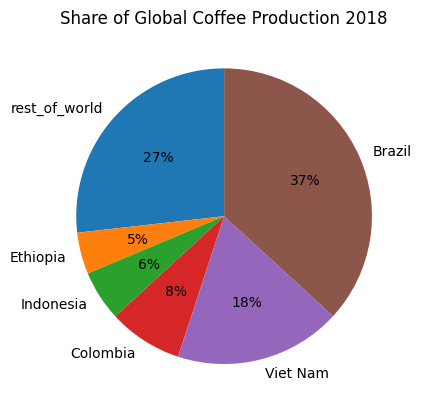

In [157]:
fig, ax = plt.subplots()

ax.pie(
    x=coffee_pie["production"][::-1],
    startangle=90,
    labels=coffee_pie.index[::-1], 
    autopct="%.0f%%",
);
ax.set_title("Share of Global Coffee Production 2018")

### Coffee Consumption Vs. Prices

In [170]:
imports = pd.read_csv("../Data/coffee/imports.csv")
imports.head()

,imports,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,1880.0,2058.0,2206.0,1836.0,1417.0,1231.0,1210.0,1294.0,1293.0,...,1309.0,1369.0,1452.0,1559.0,1555.0,NaN,NaN,NaN,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5916.0,5924.0,5828.0,5668.0,5502.0,NaN,NaN,NaN,NaN,NaN
2,Belgium/Luxembourg,2015.0,1746.0,1828.0,2063.0,2262.0,2401.0,2526.0,2544.0,3580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bulgaria,268.0,200.0,182.0,397.0,463.0,515.0,272.0,294.0,342.0,...,523.0,528.0,482.0,560.0,609.0,NaN,NaN,NaN,NaN,NaN
4,Croatia,NaN,NaN,168.0,163.0,193.0,320.0,322.0,385.0,339.0,...,394.0,394.0,391.0,384.0,413.0,NaN,NaN,NaN,NaN,NaN


In [281]:
# Reshape cols are the same
imports_long = pd.melt(imports,
                      id_vars = ["imports"],
                      value_vars = reshape_cols,
                      var_name = "year", 
                      value_name = "consumption").sort_values(["imports", "year"])

coffee_consumpt = (
    imports_long
    .groupby("imports")
    .agg({"consumption":"mean"})
    .reset_index()
    .rename(columns = {"imports": "country"})
)

# Can also do this by not reshaping
imports_wide = pd.read_csv("../Data/coffee/imports.csv").set_index("imports").mean(axis = 1)

In [282]:
prices = pd.read_csv("../Data/coffee/retail-prices.csv")

coffee_prices = pd.melt(prices,
                        id_vars = "retail_prices",
                        value_vars = reshape_cols,
                        var_name = "year",
                        value_name = "prices")

coffee_prices = (
    coffee_prices
    .groupby("retail_prices")
    .agg(price = ("prices", "mean"))
    .reset_index()
    .rename(columns = {"retail_prices": "country"})
)
#coffee_prices

# Join with the consumption data set, using the prices as the base (14 rows)

price_cons = (
    coffee_prices
    .merge(coffee_consumpt, 
           how = "inner", 
           left_on = "country", 
           right_on = "country")
    .sort_values("consumption", ascending=False)
)
price_cons

,country,price,consumption
5,Germany,9.515110,16357.666667
11,Japan,21.472939,6862.275235
6,Italy,14.199589,6696.958333
4,France,6.850879,6512.458333
9,Spain,8.029992,4046.291667
7,Netherlands,8.931263,2928.125000
10,Sweden,8.054350,1620.625000
0,Austria,11.571135,1551.083333
3,Finland,7.211692,1157.541667
2,Denmark,10.494025,991.791667


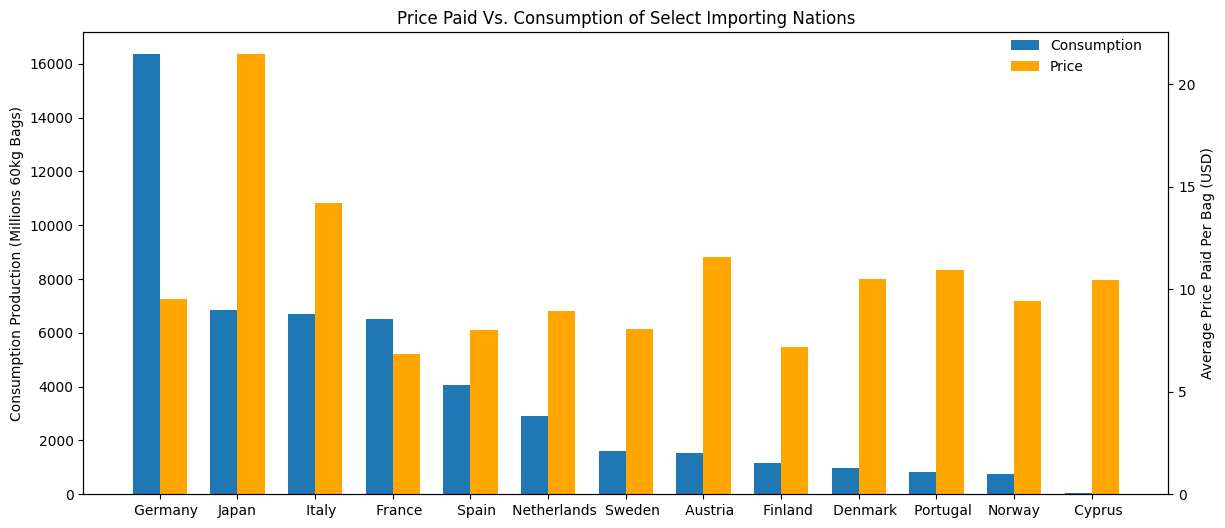

In [ ]:
# Create a dodged bar graph with the price and consumption
price_cntry_list = price_cons["country"]

fig, ax = plt.subplots(figsize = (14, 6))

x = np.arange(0, len(price_cons))
width = 0.35

ax.bar(x - width/2, price_cons["consumption"], width = width, label = "Consumption")

ax2 = ax.twinx()
ax2.bar(x + width/2, price_cons["price"], width = width, label = "Price", color = "orange")

ax.set_title("Price Paid Vs. Consumption of Select Importing Nations")
ax.set_ylabel("Consumption "+ y_label)
ax2.set_ylabel("Average Price Paid Per Bag (USD)")

fig.legend(bbox_to_anchor=(.89, .89), frameon = False)
# fig.suptitle("Nights Booked vs. Cancellations", fontsize = 16, y = .92)

plt.xticks(range(len(price_cons)), price_cntry_list, fontsize=4);

In [ ]:
price_cons["country"]

5            Germany
11             Japan
6              Italy
4             France
9              Spain
7        Netherlands
10            Sweden
0            Austria
3            Finland
2            Denmark
8           Portugal
12            Norway
1             Cyprus
Name: country, dtype: object

## Solution

In [228]:
# So We need to transpose the data frame, extract the first row as a names
coffee_production = coffee.transpose()

# Extract the first row and set it as names
coffee_production.columns = coffee_production.iloc[0, :]

# Drop the first row from the coffee_t dataframe
#coffee_t = coffee_t.iloc[1:, :]
coffee_production = coffee_production.drop("total_production")
#coffee_production = coffee_production.drop(coffee_production.index[0])

### 
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [ ]:
# We can use the numpy sum argument to sum across all rows
coffee_production.sum()

# Extract top 10
top10_producers = coffee_production.sum().sort_values(ascending=False).iloc[0:10]



total_production
Angola                                 1312.4254
Bolivia (Plurinational State of)       3368.2377
Brazil                              1190965.7353
Burundi                               10155.0003
Ecuador                               31218.6262
Indonesia                            245116.7707
Madagascar                            17043.8633
Malawi                                 1354.7744
Papua New Guinea                      29299.7079
Paraguay                               1005.6725
Peru                                  84790.6704
Rwanda                                 8986.9088
Timor-Leste                            1040.3595
Zimbabwe                               2193.7337
Congo                                    111.568
Cuba                                   5847.3911
Dominican Republic                    14755.8731
Haiti                                 11300.2118
Philippines                            14536.899
Tanzania                              23652.8701
Zam

<BarContainer object of 10 artists>

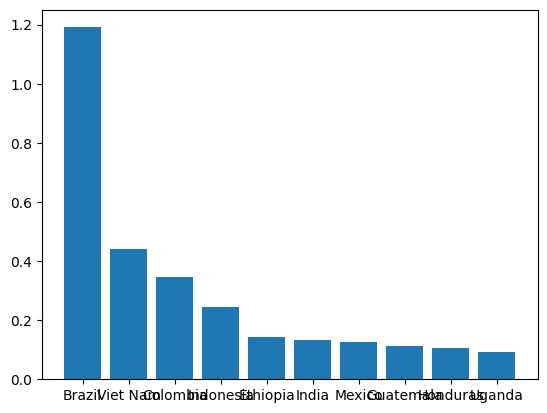

In [235]:
fig, ax = plt.subplots()

ax.bar(x = top10_producers.index, height = top10_producers/1e6)

In [238]:
top_five = coffee_production.loc[:, ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"]]
top_five.index = top_five.index.astype("datetime64[ns]")

top_five.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


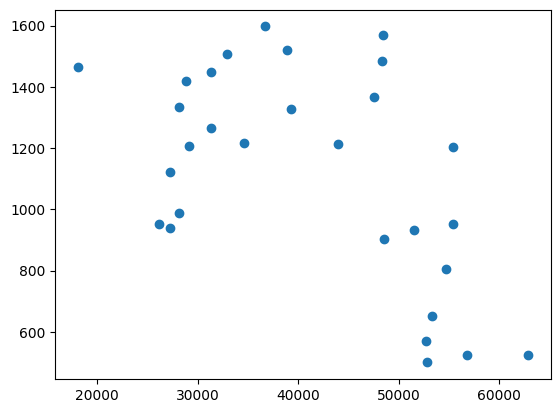

In [260]:
# Scatter plot of Brazil v Veneuzeula

fig, ax = plt.subplots()

ax.scatter(
    coffee_production["Brazil"],
    coffee_production["Venezuela"]
)

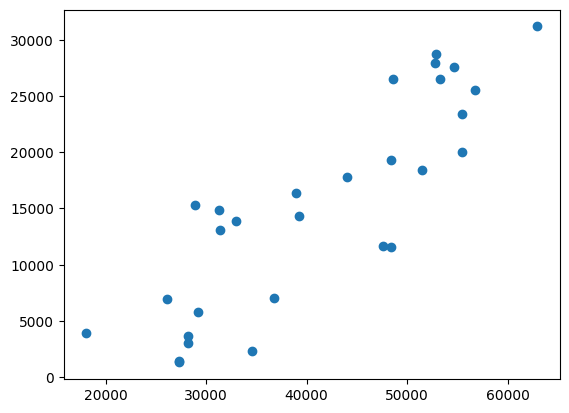

In [261]:
fig, ax = plt.subplots()

ax.scatter(
    coffee_production["Brazil"],
    coffee_production["Viet Nam"]
)

# Build a pie chart data frame

In [278]:
# EXTRACT COUNTRIES WE DO NOT WANT
top_5_list = top_5.tolist()
top_5_list

coffee_production["Rest of World"] = coffee_production.drop(top_5_list, axis = 1).sum(axis = 1)

coffee_production_top5_2018 = coffee_production.loc["2018", top_5_list+ ["Rest of World"]]


In [271]:
coffee_production.columns

Index(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Ecuador', 'Indonesia', 'Madagascar', 'Malawi', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Rwanda', 'Timor-Leste', 'Zimbabwe', 'Congo',
       'Cuba', 'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania',
       'Zambia', 'Benin', 'Cameroon', 'Central African Republic', 'Colombia',
       'Costa Rica', 'Côte d'Ivoire', 'Democratic Republic of Congo',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'India', 'Jamaica',
       'Kenya', 'Lao People's Democratic Republic', 'Liberia', 'Mexico',
       'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone', 'Sri Lanka',
       'Thailand', 'Togo', 'Trinidad & Tobago', 'Uganda', 'Venezuela',
       'Viet Nam', 'Yemen'],
      dtype='object', name='total_production')

In [280]:
# Another way to sum around a column

brazil_vs_others = (
    coffee_production
    .assign(rest_of_world = coffee_production.drop("Brazil", axis = 1).sum(axis = 1))
    .loc[:, ["Brazil", "rest_of_world"]]
    .astype({"Brazil": "float64"})    
)

brazil_vs_others.dtypes

total_production
Brazil           float64
rest_of_world     object
dtype: object